In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
n=1500
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=n)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=n)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | brookings
Processing Record 3 of Set 1 | pandan
Processing Record 4 of Set 1 | tongchuanshi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | salisbury
Processing Record 8 of Set 1 | preobrazheniye
Processing Record 9 of Set 1 | minas de matahambre
City not found. Skipping...
Processing Record 10 of Set 1 | hastings
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | bouafle
Processing Record 13 of Set 1 | san luis de la loma
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | ad douiem
Processing Record 16 of Set 1 | naha
Processing Record 17 of Set 1 | ixtapa
Processing Record 18 of Set 1 | nogliki
Processing Record 19 of Set 1 | north albury
Processing Record 20 of Set 1 | toliara
Processing Record 21 of Set 1 | callao
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | la'ie
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | prado
Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | reggane
Processing Record 44 of Set 4 | akarsu
Processing Record 45 of Set 4 | fada
Processing Record 46 of Set 4 | menongue
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | ushuaia
Processing Record 49 of Set 4 | kani keli
Processing Record 0 of Set 5 | victoriaville
Processing Record 1 of Set 5 | papatowai
Processing Record 2 of Set 5 | chonchi
Processing Record 3 of Set 5 | ketchikan
Processing Record 4 of Set 5 | al jawf
Processing Record 5 of Set 5 | diplo
Processing Record 6 of Set 5 | bikenibeu village
Processing Record 7 of Set 5 | vilyuysk
Processing Record 8 of Set 5 | bathsheba
Processing Record 9 of Set 5 | bouarfa
Processing Record 10 of Set 5 | caleta de carquin
Processing Record 11 of Set 5 | dunaivtsi
Processing Record 12 of Set 5 | klyuchi
Processing Record 13 

Processing Record 31 of Set 8 | skovorodino
Processing Record 32 of Set 8 | pankrushikha
Processing Record 33 of Set 8 | yaren
Processing Record 34 of Set 8 | santa terezinha
Processing Record 35 of Set 8 | kristiansund
Processing Record 36 of Set 8 | soio
Processing Record 37 of Set 8 | hwange
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | robore
Processing Record 40 of Set 8 | yorosso
Processing Record 41 of Set 8 | san pedro pochutla
Processing Record 42 of Set 8 | belebey
Processing Record 43 of Set 8 | pindushi
Processing Record 44 of Set 8 | akjoujt
Processing Record 45 of Set 8 | cockburn town
Processing Record 46 of Set 8 | hilo
Processing Record 47 of Set 8 | saipan
Processing Record 48 of Set 8 | mount hagen
Processing Record 49 of Set 8 | shingu
Processing Record 0 of Set 9 | dryden
Processing Record 1 of Set 9 | kokopo
Processing Record 2 of Set 9 | chernyshevskiy
Processing Record 3 of Set 9 | sinabang
Processing Record 4 of Set 9 | longboat key
Proc

Processing Record 22 of Set 12 | bodo
Processing Record 23 of Set 12 | mangrol
Processing Record 24 of Set 12 | pibor
City not found. Skipping...
Processing Record 25 of Set 12 | ambon
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | geraldton
Processing Record 28 of Set 12 | pahrump
Processing Record 29 of Set 12 | dauphin
Processing Record 30 of Set 12 | mikuni
Processing Record 31 of Set 12 | zangguy
City not found. Skipping...
Processing Record 32 of Set 12 | christchurch
Processing Record 33 of Set 12 | porto murtinho
Processing Record 34 of Set 12 | muynoq
Processing Record 35 of Set 12 | sadjoavato
City not found. Skipping...
Processing Record 36 of Set 12 | villaguay
Processing Record 37 of Set 12 | jiwani
Processing Record 38 of Set 12 | tolanaro
Processing Record 39 of Set 12 | kavieng
Processing Record 40 of Set 12 | tanout
Processing Record 41 of Set 12 | thunder bay
Processing Record 42 of Set 12 | tamanrasset
Processing Record 43 of Set 12 | itam

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,28.62,77,82,1.02,PG,1682637430
1,brookings,44.3114,-96.7984,17.27,66,75,4.12,US,1682637340
2,pandan,14.0453,124.1694,27.50,83,20,4.27,PH,1682637431
3,tongchuanshi,35.0806,109.0897,10.32,72,100,2.81,CN,1682637431
4,grytviken,-54.2811,-36.5092,2.38,83,44,3.54,GS,1682637432


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,28.62,77,82,1.02,PG,1682637430
1,brookings,44.3114,-96.7984,17.27,66,75,4.12,US,1682637340
2,pandan,14.0453,124.1694,27.50,83,20,4.27,PH,1682637431
3,tongchuanshi,35.0806,109.0897,10.32,72,100,2.81,CN,1682637431
4,grytviken,-54.2811,-36.5092,2.38,83,44,3.54,GS,1682637432


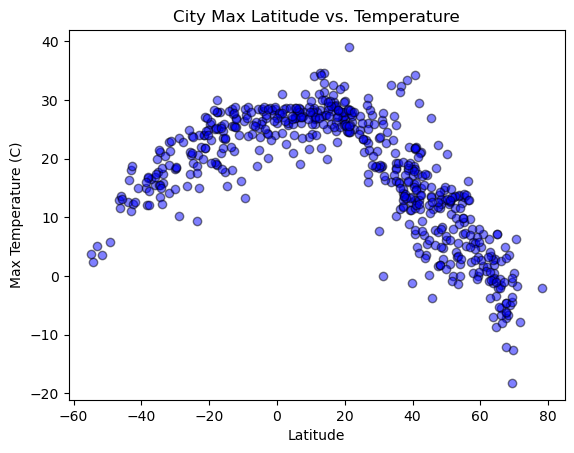

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolors='blue', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

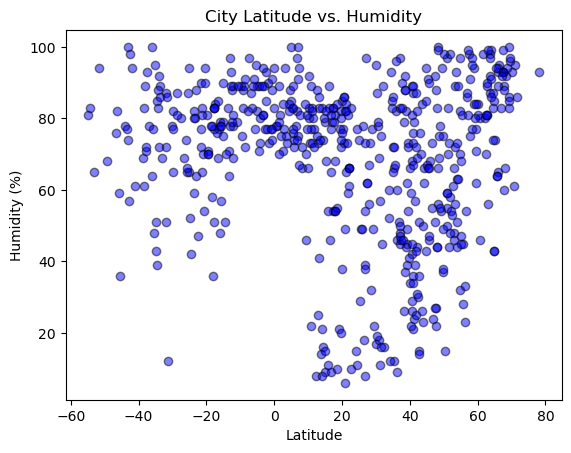

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", facecolors='blue', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

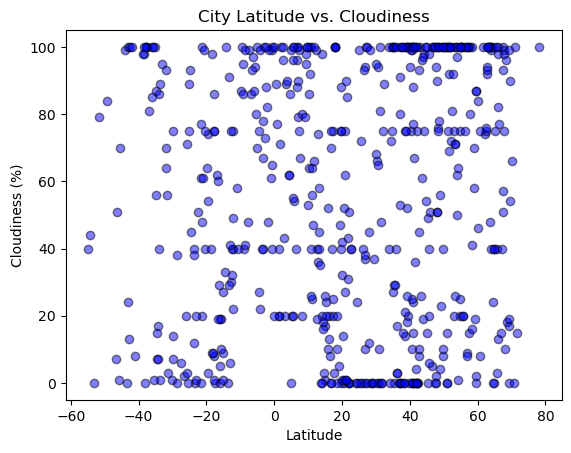

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", facecolors='blue', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

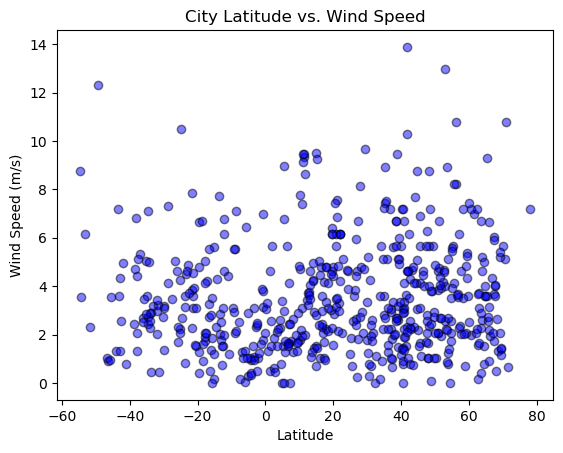

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolors='blue', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [14]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,brookings,44.3114,-96.7984,17.27,66,75,4.12,US,1682637340
2,pandan,14.0453,124.1694,27.50,83,20,4.27,PH,1682637431
3,tongchuanshi,35.0806,109.0897,10.32,72,100,2.81,CN,1682637431
5,vorgashor,67.5833,63.9500,-6.32,93,57,6.05,RU,1682637432
6,salisbury,51.0693,-1.7957,12.60,97,100,4.63,GB,1682637433


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,28.62,77,82,1.02,PG,1682637430
4,grytviken,-54.2811,-36.5092,2.38,83,44,3.54,GS,1682637432
17,north albury,-36.0569,146.9277,15.44,100,85,2.68,AU,1682637438
18,toliara,-23.3500,43.6667,20.62,80,0,4.52,MG,1682637439
19,callao,-12.0667,-77.1500,25.40,69,75,6.17,PE,1682637440


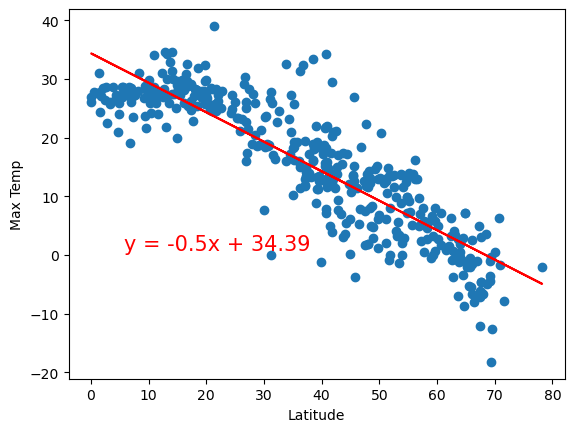

The r-value is: -0.8747323855593039


In [17]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print("The r-value is:", rvalue)

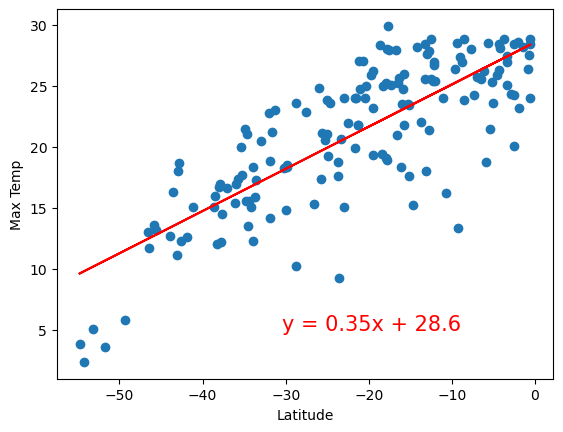

The r-value is: 0.7941464549196887


In [18]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30.5, 5), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
print("The r-value is:", rvalue)

In [19]:
# Discussion about the linear relationship: 
# Those cities around 0 latitude, have the highest maximum temperature. The higher the latitude from 0 and the lower the
# latitude from 0, the lower the temperatue becomes for both hemispheres. The two variables form a stronger relationship 
# since the data points tend to be closer to the regression line. 

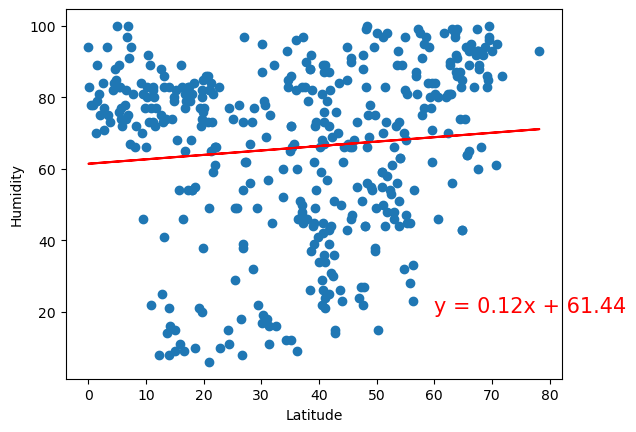

The r-value is: 0.10062417737818374


In [20]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print("The r-value is:", rvalue)

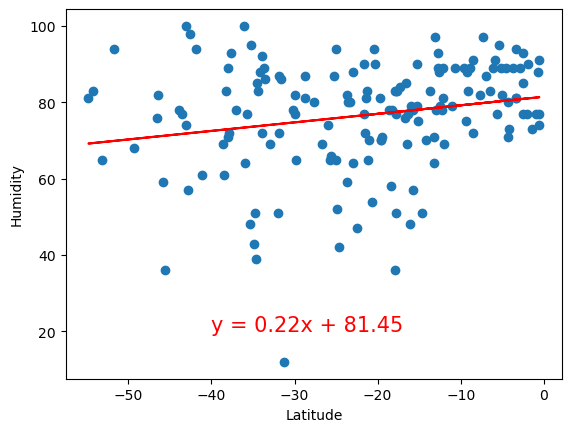

The r-value is: 0.21182256366078478


In [21]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40, 20), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print("The r-value is:", rvalue)

In [22]:
#Discussion about the linear relationship: 
# The linear relationship shows a slight increase as the latitudes increase. 

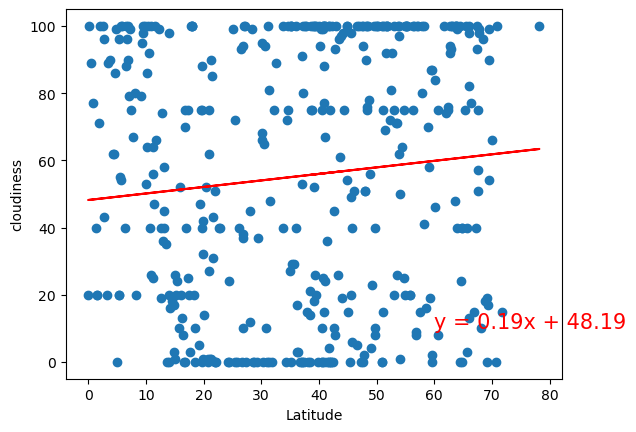

The r-value is: 0.09944146644177529


In [23]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.show()
print("The r-value is:", rvalue)

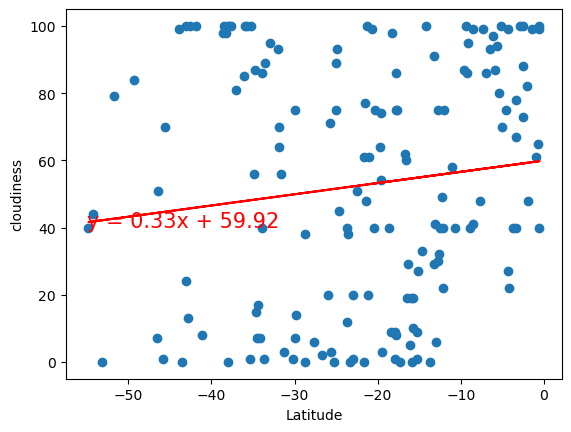

The r-value is: 0.12688301593924767


In [24]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55, 40), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.show()
print("The r-value is:", rvalue)

In [25]:
#Discussion about the linear relationship: 
# The linear relationship shows that as the latitude increases so does the cloudiness however with the data points being 
# very scattered it is not a strong relationship to confirm that information. 

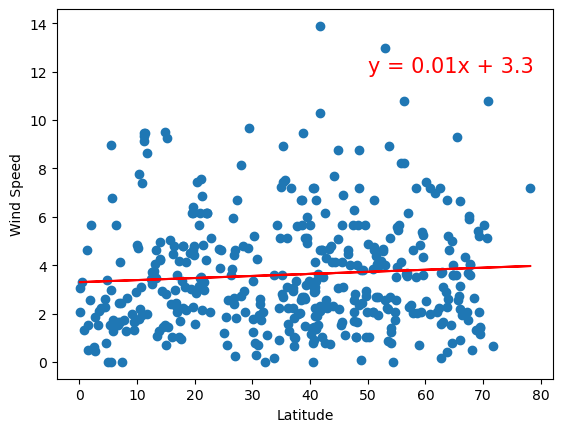

The r-value is: 0.07158123954098126


In [26]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print("The r-value is:", rvalue)

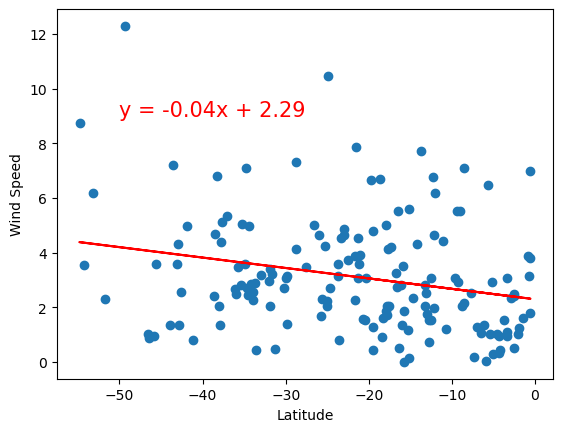

The r-value is: -0.24651760870083256


In [27]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50, 9), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print("The r-value is:", rvalue)

In [28]:
#Discussion about the linear relationship: 
# The northern hemisphere shows an equal line of wind speed across the latitudes where the southern hempisphere shows a 
# slight negative correlation. cities closer to 0 have lower wind speeds than farther away from zero. This relationship
# is not as strong since the data points are not as together. 